### Table of Contents

* [I. Téléchargement des données](#chapter1)
* [II. Mission n°2, analyse des données](#chapter2)
    * [1) Analyse des ventes selon les produits](#section_2_1)
        * [a. Les livres à succès](#section_2_1_1)
        * [b. Les livres invendus](#section_2_1_2)
        * [c. CA par article](#section_2_1_3)
    * [2) Analyse des clients](#section_2_2)
        * [a. Liste des clients qui dépensent le plus](#section_2_2_1)
        * [b. Liste des clients inactifs](#section_2_2_2)
        * [c. Suppression des clients outliers](#section_2_2_3)
        * [d. Indice de gini après la suppression des clients outliers](#section_2_2_4)
    * [3) Analyse des prix](#section_2_3)
        * [a. Dépenses par article](#section_2_3_1)
        * [b. Dépenses par article et par catégorie](#section_2_3_2)
    * [4) Analyse des ventes selon le sexe](#section_2_4)
        * [a. Répartition homme/femme](#section_2_4_1)
        * [b. Répartition des achats selon le sexe et la catégorie](#section_2_4_2)
        * [c. Prix du panier moyen selon sexe](#section_2_4_3)
    * [5) Analyse du CA](#section_2_5)
        * [a. Analyse du CA selon âge](#section_2_5_1)
        * [b. Prix du panier moyen selon age](#section_2_5_2)
        * [c. Analyse du CA selon la date](#section_2_5_3)
        * [d. Analyse du CA du mois d'octobre](#section_2_5_4)
* [III. Mission n° 3](#chapter3)
    * [1) Corrélation entre le sexe des clients et les catégories de produits achetés](#section_3_1)
    * [2) Corrélation entre l'âge des clients et...](#section_3_2)
        * [a. Le montant total des achats](#section_3_2_1)
        * [b. La fréquence d’achat (ie. nombre d'achats par mois par exemple) ](#section_3_2_2)
        * [c. La taille du panier moyen (en nombre d’articles)](#section_3_2_3)
        * [d. Les catégories de produits achetés](#section_3_2_4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency

## I. Téléchargement des données <a class="anchor" id="section_1"></a>

In [2]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv", parse_dates=[1])
info_id = pd.read_csv("info_id.csv", parse_dates=[6])
info_id

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_frmt,age,hour,month,jour,day,greg
0,0_1870,9.06,0,c_5196,m,1976.0,2021-03-01,s_393,2021-03-01 19:18:06.898158,45.0,19:18,March,Monday,1,737850
1,0_1338,9.28,0,c_6990,f,1986.0,2021-03-01,s_319,2021-03-01 15:14:28.717079,35.0,15:14,March,Monday,1,737850
2,0_1142,3.42,0,c_6983,m,1989.0,2021-03-01,s_137,2021-03-01 06:13:35.623382,32.0,06:13,March,Monday,1,737850
3,0_560,4.53,0,c_4103,f,1980.0,2021-03-01,s_233,2021-03-01 11:25:45.668969,41.0,11:25,March,Monday,1,737850
4,0_1029,7.99,0,c_7246,m,1976.0,2021-03-01,s_116,2021-03-01 05:26:21.487685,45.0,05:26,March,Monday,1,737850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_296,24.67,1,c_1092,f,1972.0,2022-02-28,s_171938,2022-02-28 00:32:05.527835,50.0,00:32,February,Monday,28,738214
336812,1_448,13.79,1,c_359,f,1988.0,2022-02-28,s_172385,2022-02-28 22:16:21.571957,34.0,22:16,February,Monday,28,738214
336813,1_388,16.70,1,c_6878,m,1950.0,2022-02-28,s_172405,2022-02-28 22:52:38.395706,72.0,22:52,February,Monday,28,738214
336814,0_1400,5.15,0,c_8294,f,1966.0,2022-02-28,s_172037,2022-02-28 05:23:22.894171,56.0,05:23,February,Monday,28,738214


## II. Mission n° 2, analyse des données <a class="anchor" id="section_2"></a>

### 1) Analyse des ventes selon les produits <a class="anchor" id="section_2_1"></a>

#### a. Les livres à succès  <a class="anchor" id="section_2_1_1"></a>

In [3]:
top_prod = info_id.groupby(["id_prod"], as_index=False)['price'].count()
top_prod.rename(columns={'price': 'quantity'}, inplace=True)
top_prod = top_prod.sort_values(by = 'quantity', ascending = False)
top_prod.head(15)

,id_prod,quantity
2591,1_369,1081
2644,1_417,1062
2733,1_498,1036
2641,1_414,1027
2653,1_425,1013
2622,1_398,952
2632,1_406,946
2640,1_413,944
2629,1_403,939
2633,1_407,933


Les trois livres qui ont le plus de succès sont : 1_369, 1_417 et 1_498

#### b. Les livres invendus <a class="anchor" id="section_2_1_2"></a>

In [4]:
l_invendus = pd.merge(products,info_id, on='id_prod', how='outer')
l_invendus['id_prod'] = l_invendus['id_prod'].astype('str')
l_invendus = l_invendus[~l_invendus['id_prod'].str.match('T')]
l_invendus['id_prod'].value_counts()

1_369     1081
1_417     1062
1_498     1036
1_414     1027
1_425     1013
          ... 
0_1624       1
0_1318       1
0_1803       1
0_1601       1
2_86         1
Name: id_prod, Length: 3287, dtype: int64

In [5]:
NaN_livres = l_invendus[l_invendus['date'].isna()]
NaN_livres.loc[:,['id_prod']]

,id_prod
19685,0_1016
31123,0_1780
80899,0_1062
88225,0_1119
90040,0_1014
93445,1_0
114537,0_1318
125974,0_1800
144153,0_1645
159270,0_322


Aucun de ces articles, sur les "3287" référencés, n'a été vendu durant la période d'étude

#### c. CA par article <a class="anchor" id="section_2_1_3"></a>

In [6]:
id_prod_dep = info_id.groupby(["id_prod"], as_index=False)["price"].sum()
id_prod_dep = id_prod_dep.sort_values(by = 'price', ascending = False)
id_prod_dep.head(15)

,id_prod,price
3070,2_135,33874.09
3045,2_112,31960.61
3034,2_102,28919.46
3152,2_209,27296.10
3043,2_110,27016.50
2591,1_369,25933.19
2619,1_395,25830.09
3104,2_166,25534.44
3206,2_43,25266.39
3201,2_39,25225.65


Classement des articles selon le CA qu'ils génèrent

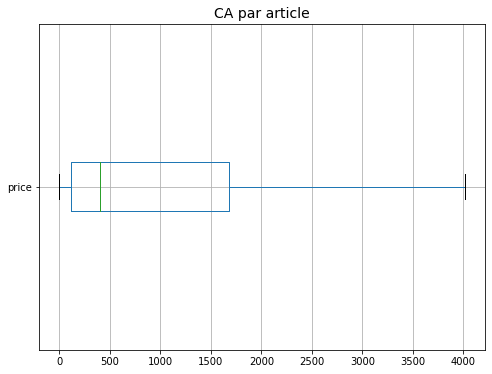

In [7]:
plt.figure(figsize=(8,6))
plt.title('CA par article',fontsize=14) 
id_prod_dep.boxplot(column="price", vert=False,showfliers=False)
plt.show()

##### Courbe de Lorenz

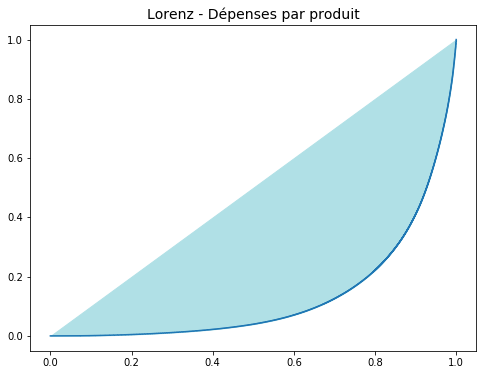

In [8]:
dep = id_prod_dep['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.figure(figsize=(8, 6))
plt.title('Lorenz - Dépenses par produit',fontsize=14) 
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.fill_between(xaxis,xaxis,lorenz, color='powderblue')
plt.show()

##### Indice de gini

In [9]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.7384609271410616

Entre 0 et 1, l'inégalité est d'autant plus forte que l'indice de Gini est élevé. On peut constater, avec un indice de 0,73 que les dépenses par produit ou CA par article ne sont pas équitablement répartis. Cette repartition inégalitaire se vérifie sur la boite à moustaches. 

### 2) Analyse des clients <a class="anchor" id="section_2_2"></a>

#### a. Liste des clients qui dépensent le plus <a class="anchor" id="section_2_2_1"></a>

In [10]:
client_id_dep = info_id.groupby(["client_id"], as_index=False)["price"].sum()
client_id_dep = client_id_dep.sort_values(by = 'price', ascending = False)
client_id_dep.head(15)

,client_id,price
677,c_1609,162007.340000
4388,c_4958,144257.210000
6337,c_6714,73220.805589
2724,c_3454,54466.385589
7715,c_7959,2564.250000
7791,c_8026,2549.402795
3870,c_4491,2540.530000
1268,c_2140,2527.010000
8195,c_8392,2515.980000
7120,c_7421,2511.980000


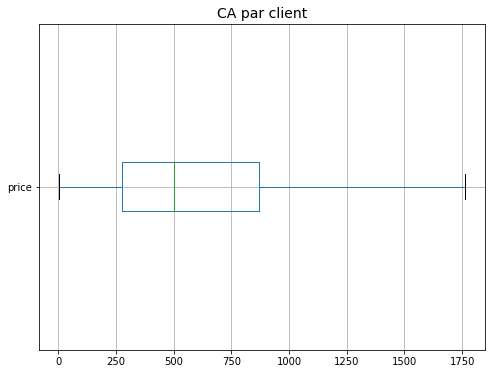

In [11]:
plt.figure(figsize=(8,6))
plt.title('CA par client',fontsize=14) 
client_id_dep.boxplot(column="price", vert=False,showfliers=False)
plt.show()

On peut identifier quatres supers clients : c_1609, c_6714, c_3454 et c_4958, que l'on peut considérer comme des outliers pour la suite de l'étude.

##### Courbe de Lorenz

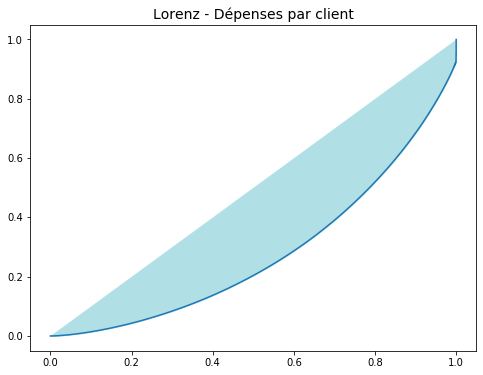

In [12]:
dep = client_id_dep['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


plt.figure(figsize=(8, 6))
plt.title('Lorenz - Dépenses par client',fontsize=14) 
xaxis = np.linspace(0,1,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.fill_between(xaxis,xaxis,lorenz, color='powderblue')
plt.show()

##### Indice de Gini

In [13]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.43971749063805265

Avec un indice de 0,43, la répartition du CA par client est déjà plus égalitaire que par article. Cependant, les 4 supers clients qui se démarquent pèsent un poids important de cette répartition inégalitaire.

#### b. Liste des clients inactifs <a class="anchor" id="section_2_2_2"></a>

In [14]:
c_inactifs = pd.merge(customers,info_id, on='client_id', how='outer')
c_inactifs['client_id'] = c_inactifs['client_id'].astype('str')
c_inactifs = c_inactifs[~c_inactifs['client_id'].str.match('ct')]
c_inactifs['client_id'].value_counts()

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
c_2140      195
          ...  
c_2226        1
c_4447        1
c_8351        1
c_862         1
c_890         1
Name: client_id, Length: 8621, dtype: int64

In [15]:
NaN_client = c_inactifs[c_inactifs['date'].isna()]
NaN_client.loc[:,['client_id']]

,client_id
29516,c_8253
99355,c_3789
108189,c_4406
109297,c_2706
111919,c_3443
123282,c_4447
123536,c_3017
129493,c_4086
155402,c_6930
158643,c_4358


Voici la liste des tous les clients qui n'ont effectué aucun achat durant la période de réference sur les 8621 clients repertiorés dans la base de données.

#### c. Suppression des clients outliers <a class="anchor" id="section_2_2_3"></a>

In [16]:
info_id = info_id.loc[~info_id["client_id"].isin(['c_1609','c_6714','c_3454','c_4958'])].copy(deep=False)
info_id

,id_prod,price,categ,client_id,sex,birth,date,session_id,date_frmt,age,hour,month,jour,day,greg
0,0_1870,9.06,0,c_5196,m,1976.0,2021-03-01,s_393,2021-03-01 19:18:06.898158,45.0,19:18,March,Monday,1,737850
1,0_1338,9.28,0,c_6990,f,1986.0,2021-03-01,s_319,2021-03-01 15:14:28.717079,35.0,15:14,March,Monday,1,737850
2,0_1142,3.42,0,c_6983,m,1989.0,2021-03-01,s_137,2021-03-01 06:13:35.623382,32.0,06:13,March,Monday,1,737850
3,0_560,4.53,0,c_4103,f,1980.0,2021-03-01,s_233,2021-03-01 11:25:45.668969,41.0,11:25,March,Monday,1,737850
4,0_1029,7.99,0,c_7246,m,1976.0,2021-03-01,s_116,2021-03-01 05:26:21.487685,45.0,05:26,March,Monday,1,737850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_296,24.67,1,c_1092,f,1972.0,2022-02-28,s_171938,2022-02-28 00:32:05.527835,50.0,00:32,February,Monday,28,738214
336812,1_448,13.79,1,c_359,f,1988.0,2022-02-28,s_172385,2022-02-28 22:16:21.571957,34.0,22:16,February,Monday,28,738214
336813,1_388,16.70,1,c_6878,m,1950.0,2022-02-28,s_172405,2022-02-28 22:52:38.395706,72.0,22:52,February,Monday,28,738214
336814,0_1400,5.15,0,c_8294,f,1966.0,2022-02-28,s_172037,2022-02-28 05:23:22.894171,56.0,05:23,February,Monday,28,738214


#### d. Indice de gini après la suppression des clients outliers <a class="anchor" id="section_2_2_4"></a> 

In [17]:
client_id_dep = info_id.groupby(["client_id"], as_index=False)["price"].sum()
client_id_dep = client_id_dep.sort_values(by = 'price', ascending = False)
client_id_dep

,client_id,price
7711,c_7959,2564.250000
7787,c_8026,2549.402795
3868,c_4491,2540.530000
1267,c_2140,2527.010000
8191,c_8392,2515.980000
...,...,...
8147,c_8351,6.310000
8476,c_890,6.080000
749,c_1675,5.570000
7885,c_8114,4.990000


In [18]:
dep = client_id_dep['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.39506676837595067

L'indice de gini baisse considérablement après avoir supprimé les clients outliers. La suite de l'étude sera plus cohérente sans ces clients.

### 3) Analyse des prix <a class="anchor" id="section_2_3"></a>

#### a. Dépenses par article <a class="anchor" id="section_2_3_1"></a>

moy:
 17.101282975951108
med:
 13.82
mod:
 0    15.99
dtype: float64
var:
 309.5593146336975
ect:
 17.594297787456522
skw:
 5.541912808275833
kur:
 46.66990104687682


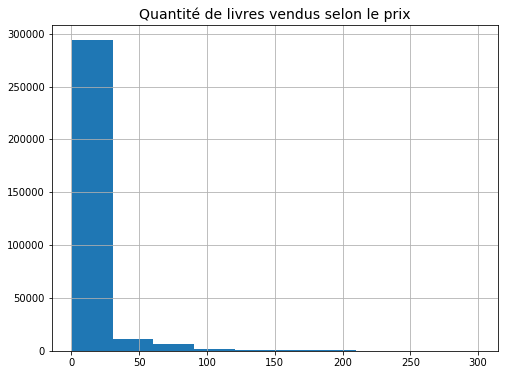

In [19]:
print("moy:\n",info_id['price'].mean())
print("med:\n",info_id['price'].median())
print("mod:\n",info_id['price'].mode())
print("var:\n",info_id['price'].var(ddof=0))
print("ect:\n",info_id['price'].std(ddof=0))
print("skw:\n",info_id['price'].skew())
print("kur:\n",info_id['price'].kurtosis())
plt.figure(figsize=(8, 6))
plt.title('Quantité de livres vendus selon le prix',fontsize=14) 
info_id["price"].hist() 
plt.show()

17,10€ est la moyenne des prix des livres les plus fréquement achetés  
13.82€ est le prix médian des livres achetés  
15,99€ est le prix des livres les plus fréquement achetés  
309.5€ est variance empirique c'est à dire un indicateur de dispersion des valeurs, elle est d’autant plus grande que les valeurs sont étalées  
17.59€ est l'écart-type empirique, c'est à dire la racine carrée de la variance empirique  
5,5 est le Skewness empirique, >0 alors la distribution est étalée à droite  
46,66 est le Kurtosis empirique >0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées

#### b. Dépenses par article et par catégorie <a class="anchor" id="section_2_3_2"></a>

--------------------
0
moy:
 10.64560125296922
med:
 9.99
mod:
 0    4.99
dtype: float64
var:
 24.27481548779922
ect:
 4.92694788766831
skw:
 0.42507114317285255
kur:
 -0.3780720553451289


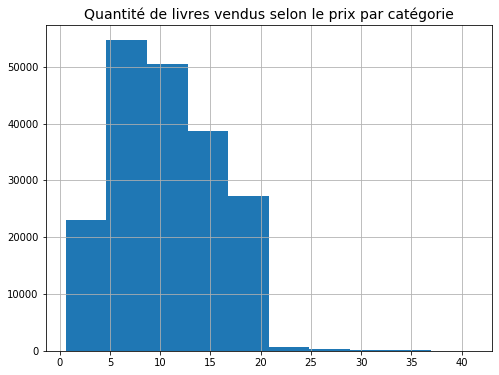

--------------------
1
moy:
 20.47829807551574
med:
 19.08
mod:
 0    15.99
dtype: float64
var:
 57.333753312950584
ect:
 7.571905527207176
skw:
 1.7168805164809877
kur:
 8.04710972803425


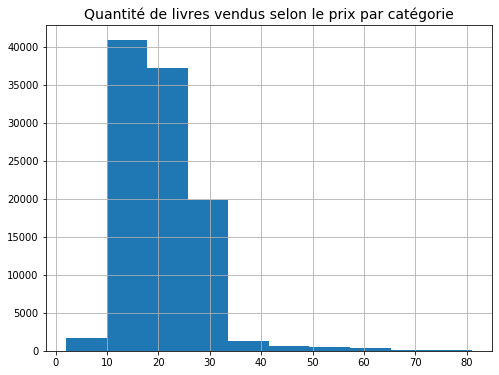

--------------------
2
moy:
 75.11313848692208
med:
 62.54
mod:
 0    68.99
dtype: float64
var:
 1531.8809728803396
ect:
 39.139251051602145
skw:
 2.3130531091776168
kur:
 5.4759231387312095


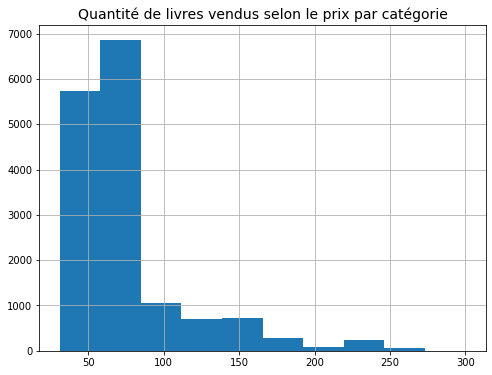

In [20]:
for cat in info_id["categ"].unique():
    subset = info_id[info_id.categ == cat] 
    print("-"*20)
    print(cat)
    print("moy:\n",subset['price'].mean())
    print("med:\n",subset['price'].median())
    print("mod:\n",subset['price'].mode())
    print("var:\n",subset['price'].var(ddof=0))
    print("ect:\n",subset['price'].std(ddof=0))
    print("skw:\n",subset['price'].skew())
    print("kur:\n",subset['price'].kurtosis())
    plt.figure(figsize=(8, 6))
    plt.title('Quantité de livres vendus selon le prix par catégorie',fontsize=14) 
    subset["price"].hist() 
    plt.show()

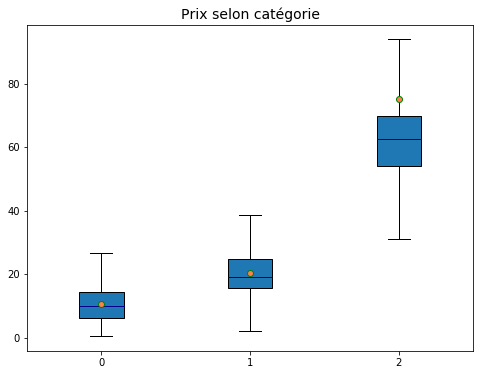

In [21]:
X = "categ" # qualitative
Y = "price" # quantitative

modalites = info_id[X].unique()
groupes = []
for m in modalites:
    groupes.append(info_id[info_id[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Prix selon catégorie',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [22]:
X = "categ" # qualitative
Y = "price" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(info_id[X],info_id[Y])

0.6419914356237635

Le calcul d'Eta carré étant très proche de 1, nous pouvons étalir une correlation entre la variable catégorie et la variable prix. Nous le constatons également grace aux boites à moustaches qui prennent toutes les 3 des valeurs différentes.


### 4) Analyse des ventes selon le sexe <a class="anchor" id="section_2_4"></a>

#### a. Répartition homme/femme <a class="anchor" id="section_2_4_1"></a>

In [23]:
info_id['sex'].value_counts()

f    163102
m    150549
Name: sex, dtype: int64

In [24]:
Ratio_fh = 163102 / (150549 + 163102) * 100
Ratio_fh

52.0011095134401

52% des clients sont des femmes

#### b. Répartition des achats selon le sexe et la catégorie <a class="anchor" id="section_2_4_2"></a>

--------------------
m
0    94064
1    48851
2     7634
Name: categ, dtype: int64


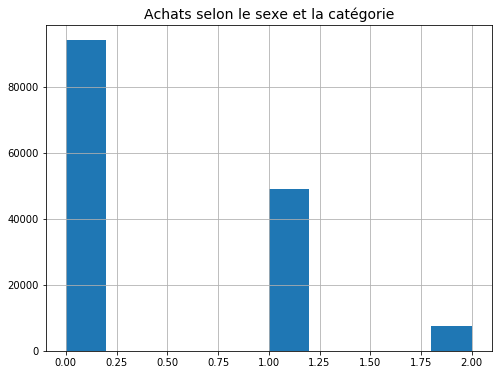

--------------------
f
0    101206
1     53774
2      8122
Name: categ, dtype: int64


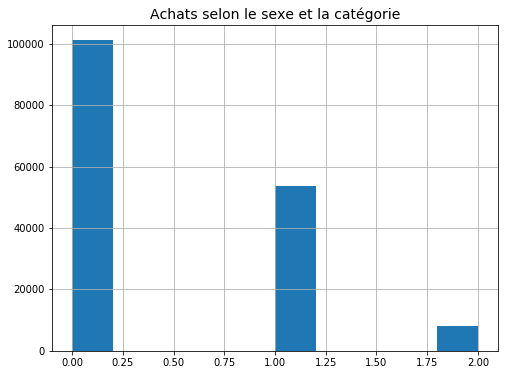

In [25]:
for cat in info_id["sex"].unique():
    plt.figure(figsize=(8, 6))
    subset = info_id[info_id.sex == cat] 
    print("-"*20)
    print(cat)
    print(subset["categ"].value_counts())
    subset["categ"].hist() 
    plt.title('Achats selon le sexe et la catégorie',fontsize=14) 
    plt.show()

In [26]:
achat_sex_categ = pd.DataFrame({'M': [94064, 48851, 7634], 'F': [101206, 53774, 8122]},
                      index = [0, 1, 2])
achat_sex_categ['M %'] = achat_sex_categ['M'] / 150549 *100
achat_sex_categ['F %'] = achat_sex_categ['F'] / 163102 *100
achat_sex_categ

,M,F,M %,F %
0,94064,101206,62.480654,62.050741
1,48851,53774,32.448572,32.969553
2,7634,8122,5.070774,4.979706


#### c. Prix du panier moyen selon sexe <a class="anchor" id="section_2_4_3"></a>

In [27]:
panier_moyen = info_id.groupby(["session_id"], as_index=False)["price"].sum()
panier_moyen_sexe = info_id.loc[:,["session_id",'sex']]
panier_moyen_sexe = pd.merge(panier_moyen, panier_moyen_sexe, on='session_id', how='right')
panier_moyen_sexe = panier_moyen_sexe.drop_duplicates(['session_id'])
panier_moyen_sexe

,session_id,price,sex
0,s_1,11.99,f
1,s_10,26.99,f
2,s_100,33.72,f
4,s_1000,39.22,m
8,s_10000,41.49,f
...,...,...,...
313639,s_99994,28.92,m
313642,s_99995,19.84,f
313643,s_99996,56.27,f
313647,s_99997,6.99,f


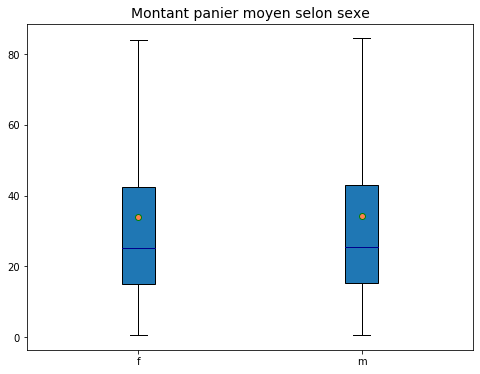

In [28]:
X = "sex" # qualitative
Y = "price" # quantitative

modalites = panier_moyen_sexe[X].unique()
groupes = []
for m in modalites:
    groupes.append(panier_moyen_sexe[panier_moyen_sexe[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Montant panier moyen selon sexe',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [29]:
X = "sex" # qualitative
Y = "price" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(panier_moyen_sexe[X],panier_moyen_sexe[Y])

2.5379356386369924e-05

Le calcul d'Eta carré étant très proche de Zero, nous ne pourrons étalir aucune correlation entre la variable sexe et la variable panier moyen. Nous le constatons également grace aux boites à moustaches qui sont parfaitement similaires

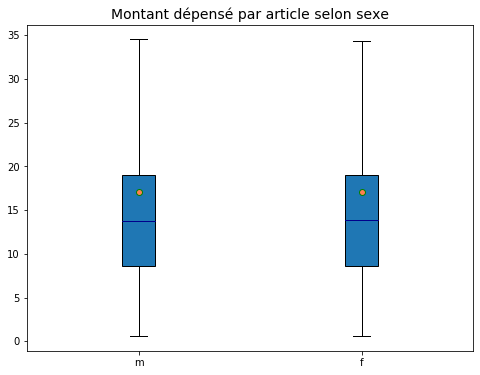

In [30]:
X = "sex" # qualitative
Y = "price" # quantitative

modalites = info_id[X].unique()
groupes = []
for m in modalites:
    groupes.append(info_id[info_id[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Montant dépensé par article selon sexe',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [31]:
X = "sex" # qualitative
Y = "price" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(info_id[X],info_id[Y])

9.228406914338111e-07

Le calcul d'Eta carré étant très proche de Zero, nous ne pourrons étalir aucune correlation entre la variable sexe et la variable prix. Nous le constatons également grace aux boites à moustaches qui sont parfaitement similaires

### 5) Analyse du CA <a class="anchor" id="section_2_5"></a>

#### a. Analyse du CA selon âge <a class="anchor" id="section_2_5_1"></a>

In [32]:
CA_birth = info_id.loc[:,["price",'age']]
CA_birth = info_id.groupby(["age"], as_index=False)["price"].sum()
CA_birth

,age,price
0,17.0,240669.910000
1,18.0,127250.030000
2,19.0,90587.952795
3,20.0,83495.810000
4,21.0,80126.282795
...,...,...
72,89.0,2887.610000
73,90.0,1664.940000
74,91.0,1809.920000
75,92.0,1332.170000


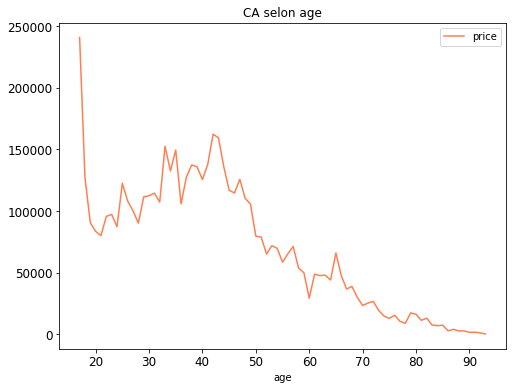

In [33]:
CA_birth.plot(x = 'age', y=['price'],figsize=(8, 6), color='coral', title = 'CA selon age', fontsize=12)
plt.show()

Nous pouvons constater que la catégorie qui génere le plus de chiffre d'affaire est celle autour de 45 ans. Le chiffre d'affaire décroit ensuite de façon inverse à l'âge.

#### c. Analyse du CA selon la date <a class="anchor" id="section_2_5_3"></a>

##### Répartition CA / mois

In [34]:
CA_month = info_id.groupby(["month"], as_index=False)["price"].sum()
CA_month['ordre'] = [2,6,10,12,11,5,4,1,3,9,8,7]
CA_month = CA_month.sort_values(by = 'ordre')
CA_month

,month,price,ordre
7,March,443044.705152,1
0,April,436338.330741,2
8,May,451405.802357,3
6,June,444937.866768,4
5,July,445703.341178,5
1,August,443277.275152,6
11,September,466891.153535,7
10,October,295320.679562,8
9,November,475229.807946,9
2,December,484825.929562,10


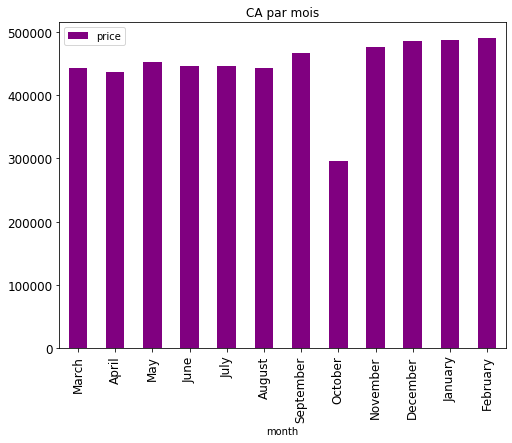

In [35]:
CA_month.plot(x = 'month', y=['price'],figsize=(8, 6),kind = 'bar', color='purple', title = 'CA par mois', fontsize=12)
plt.show()

Nous pouvons constater qu'il semblerait qu'il y est eu un problème d'enregistrement au mois octobre 

#### d. Analyse du CA du mois d'octobre <a class="anchor" id="section_2_5_4"></a>

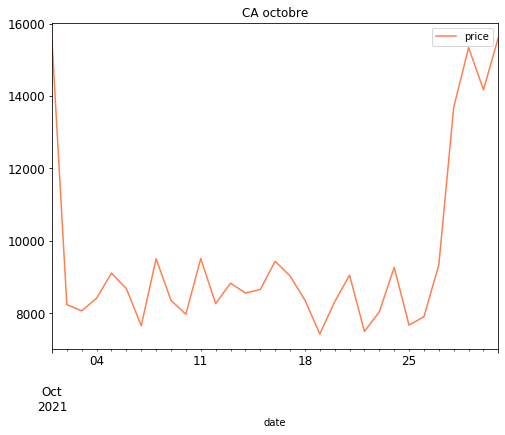

In [36]:
october = info_id[info_id.month == 'October'].groupby(["date"], as_index=False)["price"].sum()
october.plot(x = 'date', y=['price'],figsize=(8, 6), color='coral', title = 'CA octobre', fontsize=12)
plt.show()

Il semblerait que le problème s'étale du 1e au 27 octobre

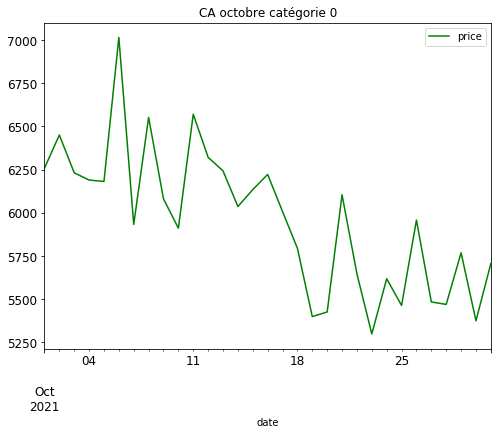

In [37]:
categ_vente = info_id[info_id.month == "October"]
categ_vente0 = categ_vente[categ_vente.categ == 0]
october0 = categ_vente0.groupby(["date"], as_index=False)['price'].sum()
october0.plot(x = 'date', y=['price'],figsize=(8, 6), color='green', title = 'CA octobre catégorie 0', fontsize=12)
plt.show()

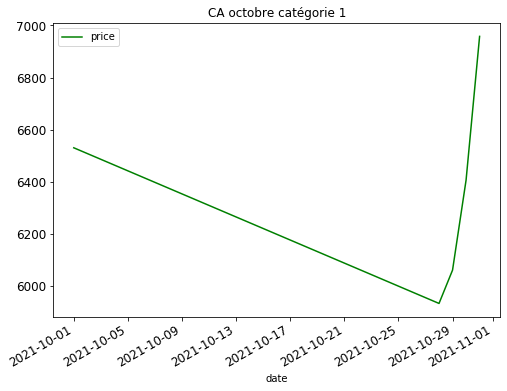

In [38]:
categ_vente1 = categ_vente[categ_vente.categ == 1]
october1 = categ_vente1.groupby(["date"], as_index=False)['price'].sum()
october1.plot(x = 'date', y=['price'],figsize=(8, 6), color='green', title = 'CA octobre catégorie 1', fontsize=12)
plt.show()

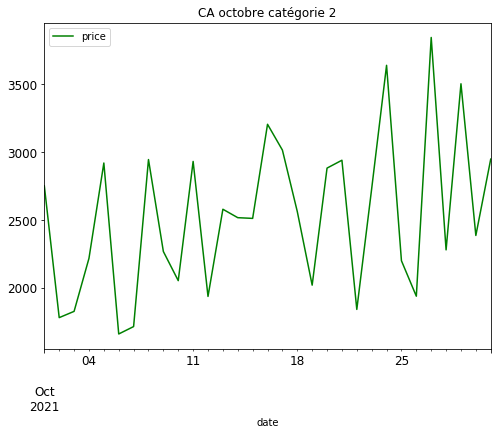

In [39]:
categ_vente2 = categ_vente[categ_vente.categ == 2]
october2 = categ_vente2.groupby(["date"], as_index=False)['price'].sum()
october2.plot(x = 'date', y=['price'],figsize=(8, 6), color='green', title = 'CA octobre catégorie 2', fontsize=12)
plt.show()

La catégorie 1 est donc celle qui pose problème

In [40]:
october0.rename(columns={'price': 'CA0'}, inplace=True)
october1.rename(columns={'price': 'CA1'}, inplace=True)
october2.rename(columns={'price': 'CA2'}, inplace=True)
vente_october = pd.merge(october0,october1, on='date', how='outer')
vente_october = pd.merge(vente_october,october2, on='date', how='outer')
vente_october['CA1'] = vente_october['CA1'].fillna(0)
cols=["date","CA1","CA2","CA0"]
vente_october=vente_october.reindex(columns=cols)
vente_october

,date,CA1,CA2,CA0
0,2021-10-01,6530.99,2752.09,6258.120000
1,2021-10-02,0.00,1781.00,6450.520000
2,2021-10-03,0.00,1827.13,6231.860000
3,2021-10-04,0.00,2217.94,6189.785589
4,2021-10-05,0.00,2920.56,6181.620000
5,2021-10-06,0.00,1660.50,7014.930000
6,2021-10-07,0.00,1715.08,5932.980000
7,2021-10-08,0.00,2946.05,6552.440000
8,2021-10-09,0.00,2268.30,6080.920000
9,2021-10-10,0.00,2053.54,5911.370000


Nous vérifions ici que le problème d'enregistrement a bien eu lieu au niveau de la catégorie 1 du 02/12 au 27/12

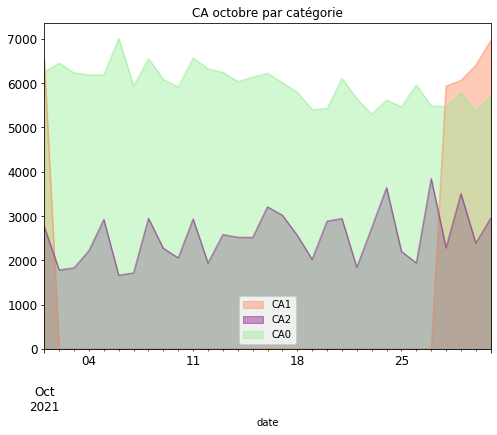

In [41]:
vente_october.plot.area(x ='date', alpha=0.4, color=['coral', 'purple', 'lightgreen'],figsize=(8, 6), title='CA octobre par catégorie', fontsize=12, stacked=False)
plt.show()

##### Calcul des valeurs manquantes par regression linéaire

In [42]:
info_id1 = info_id[info_id.categ == 1]
info_id1 = info_id1.loc[~info_id["month"].isin(['October','November','December','January','February'])]
info_id1 = info_id1.loc[:,["greg",'price']]
info_id1 = info_id1.groupby(["greg"], as_index=False)["price"].sum()
info_id1

,greg,price
0,737850,6375.49
1,737851,5253.16
2,737852,5217.22
3,737853,5614.73
4,737854,6522.55
...,...,...
209,738059,5785.17
210,738060,6428.94
211,738061,5925.90
212,738062,6374.58


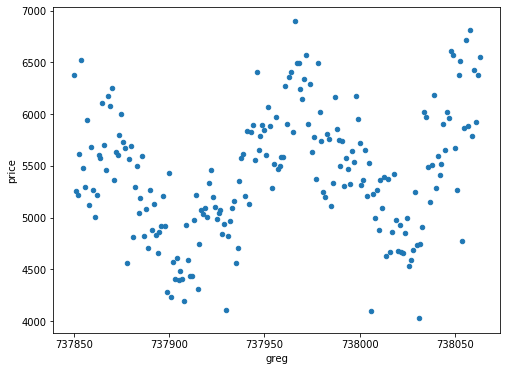

In [43]:
info_id1.plot(x='greg', y= 'price', kind = 'scatter',figsize=(8, 6))
plt.show()

In [44]:
Y = info_id1['price']
X = info_id1[['greg']]
X = X.copy() # On modifiera X, on en crée donc une cop
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['greg'],result.params['intercept']

##### Coefficient de correlation 

In [45]:
print(st.pearsonr(info_id1["price"],info_id1["greg"])[0])

0.19986378299584534


In [46]:
a

1.940263176107498

##### Ordonnée à l'origine

In [47]:
b

-1426407.688967771

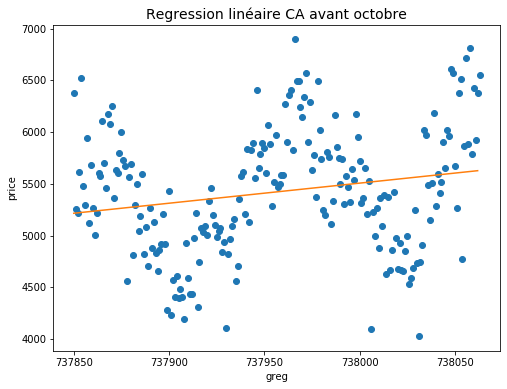

In [48]:
plt.figure(figsize=(8, 6))
plt.title('Regression linéaire CA avant octobre',fontsize=14) 
plt.plot(info_id1.greg,info_id1.price, "o")
plt.plot(np.arange(737850,738063),[a*x+b for x in np.arange(737850,738063)])
plt.xlabel("greg")
plt.ylabel("price")
plt.show()

In [49]:
vente_october['greg'] = vente_october['date'].map(dt.datetime.toordinal)
vente_october['CA1 imput'] = vente_october['greg']*a+b
vente_october.loc[vente_october['CA1'] == 0.00, 'CA1'] = vente_october['CA1 imput']
vente_october['CA'] = vente_october['CA1'] + vente_october['CA2'] + vente_october['CA0']
vente_october['month'] = vente_october['date'].dt.strftime('%B')
vente_october

,date,CA1,CA2,CA0,greg,CA1 imput,CA,month
0,2021-10-01,6530.990000,2752.09,6258.120000,738064,5630.711843,15541.200000,October
1,2021-10-02,5632.652106,1781.00,6450.520000,738065,5632.652106,13864.172106,October
2,2021-10-03,5634.592369,1827.13,6231.860000,738066,5634.592369,13693.582369,October
3,2021-10-04,5636.532632,2217.94,6189.785589,738067,5636.532632,14044.258222,October
4,2021-10-05,5638.472896,2920.56,6181.620000,738068,5638.472896,14740.652896,October
5,2021-10-06,5640.413159,1660.50,7014.930000,738069,5640.413159,14315.843159,October
6,2021-10-07,5642.353422,1715.08,5932.980000,738070,5642.353422,13290.413422,October
7,2021-10-08,5644.293685,2946.05,6552.440000,738071,5644.293685,15142.783685,October
8,2021-10-09,5646.233948,2268.30,6080.920000,738072,5646.233948,13995.453948,October
9,2021-10-10,5648.174211,2053.54,5911.370000,738073,5648.174211,13613.084211,October


In [50]:
vdf_october = vente_october.groupby(["month"], as_index=False)["CA"].sum()
vdf_october

,month,CA
0,October,442400.219851


In [51]:
v_october = vente_october['CA'].sum()
print(v_october)

442400.21985087515


In [52]:
CA_month.loc[CA_month['month'] == 'October', 'price'] = v_october
CA_month

,month,price,ordre
7,March,443044.705152,1
0,April,436338.330741,2
8,May,451405.802357,3
6,June,444937.866768,4
5,July,445703.341178,5
1,August,443277.275152,6
11,September,466891.153535,7
10,October,442400.219851,8
9,November,475229.807946,9
2,December,484825.929562,10


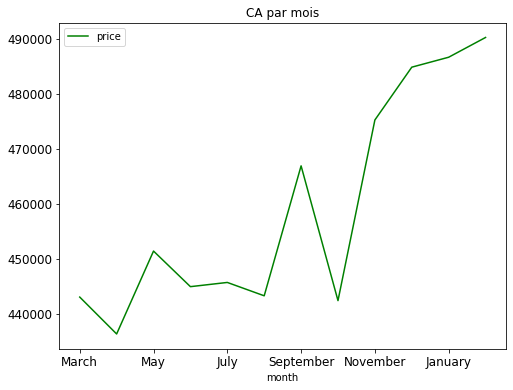

In [53]:
CA_month.plot(x = 'month', y=['price'],figsize=(8, 6), color='green', title = 'CA par mois', fontsize=12)
plt.show()

Le CA par mois connait un pic en semptembre que l'on peut associer à la rentrée des classes puis il croit jusqu'à la fin de la période de référence


## III. Mission n° 3 <a class="anchor" id="section_3"></a>

### 1) Corrélation entre le sexe des clients et les catégories de produits achetés <a class="anchor" id="section_3_1"></a>

In [54]:
X = "sex"
Y = "categ"
cont = info_id[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,101206,53774,8122,163102
m,94064,48851,7634,150549
Total,195270,102625,15756,313651


In [55]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(info_id)
indep = tx.dot(ty) / n
indep[0] = indep[0].astype(int)
indep[1] = indep[1].astype(int)
indep[2] = indep[2].astype(int)
indep['Total'] = indep['Total'].astype(int)
indep

categ,0,1,2,Total
sex,,,,
f,101542,53366,8193,163102
m,93727,49258,7562,150549
Total,195270,102625,15756,313651


#### Heat map

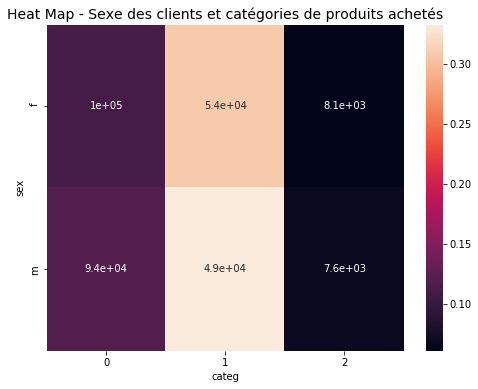

In [56]:
plt.figure(figsize=(8, 6))
plt.title('Heat Map - Sexe des clients et catégories de produits achetés',fontsize=14) 
measure = (cont-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=cont.iloc[:-1,:-1])
plt.show()

Grace au tableau de contingence coloré, nous pouvons constater que les cases les plus foncées sont source de non-indépendance : C'est à dire la catégorie 2 et 0 

### 2) Corrélation entre l'âge des clients et... <a class="anchor" id="section_3_2"></a>

#### a. Le montant total des achats <a class="anchor" id="section_3_2_1"></a>

In [57]:
total_age = info_id.loc[:,["session_id",'age']]
total_age = pd.merge(total_age, panier_moyen, on='session_id', how='right')
total_age = total_age.drop_duplicates(['session_id'])
total_age = total_age.groupby(["age"], as_index=False)['price'].mean()
total_age

,age,price
0,17.0,70.681325
1,18.0,69.917599
2,19.0,71.216944
3,20.0,70.460599
4,21.0,67.788733
...,...,...
72,89.0,25.329912
73,90.0,27.294098
74,91.0,30.165333
75,92.0,20.184394


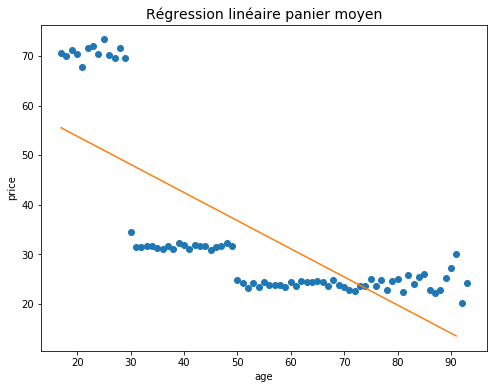

In [58]:
Y = total_age['price']
X = total_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une cop
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
plt.figure(figsize=(8, 6))
plt.title("Régression linéaire panier moyen",fontsize=14) 
plt.plot(total_age.age,total_age.price, "o")
plt.plot(np.arange(17,92),[a*x+b for x in np.arange(17,92)])
plt.xlabel("age")
plt.ylabel("price")
plt.show()

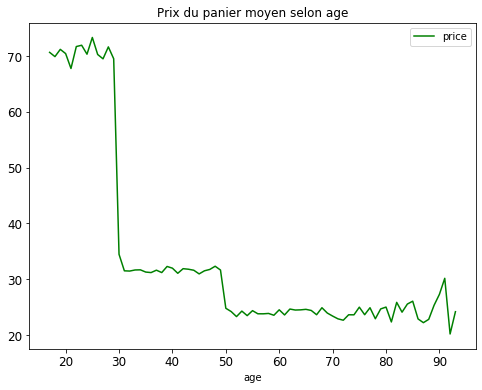

In [59]:
total_age.plot(x = 'age', y=['price'],figsize=(8, 6), color='green', title = 'Prix du panier moyen selon age', fontsize=12)
plt.show()

In [60]:
print(st.pearsonr(total_age["age"],total_age["price"])[0])
print(np.cov(total_age["age"],total_age["price"],ddof=0)[1,0])

-0.7470782975459913
-280.26076188565355


Le coefficient de corrélation ou coefficient de Pearson est proche de 1 donc la relation linéaire entre les variables montant total des achats et âge est forte. Nous pouvons constater le prix du panier moyen décroit selon l'âge. On pourrait imaginer qu'un étudiant dépense plus qu'une personne active ou qu'il existe un programme de fidelité pour les moins de 30 ans. 

#### b. La fréquence d’achat (ie. nombre d'achats par mois par exemple) <a class="anchor" id="section_3_2_2"></a>

In [61]:
frequence_age = info_id[['client_id','month']].pivot_table(index='client_id',columns='month',aggfunc=len)
age = info_id.loc[:,['client_id','age']]
frequence_age = pd.merge(age,frequence_age, on='client_id', how='right')
frequence_age = frequence_age.drop_duplicates(['client_id'])
frequence_age = frequence_age.groupby(["age"], as_index=False).mean()
frequence_age['Total'] = frequence_age.loc[:,['April','August','December','February','January','July','June','March','May','November','October','September']].sum(axis=1)/12
frequence_age = frequence_age.loc[:,['age','Total']]
frequence_age

,age,Total
0,17.0,2.700414
1,18.0,2.633675
2,19.0,2.600170
3,20.0,2.661991
4,21.0,2.782831
...,...,...
71,88.0,3.023611
72,89.0,3.425000
73,90.0,2.875000
74,91.0,4.812500


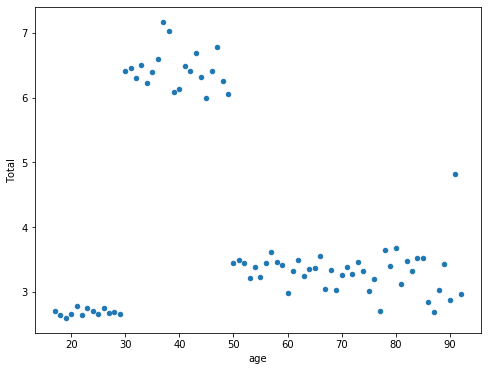

In [62]:
frequence_age.plot(figsize=(8, 6), x='age', y= 'Total', kind = 'scatter')
plt.show()

##### Coefficient de Pearson

In [63]:
print(st.pearsonr(frequence_age["age"],frequence_age["Total"])[0])

-0.27991075646524255


Le coefficient de corrélation ou coefficient de Pearson est proche de 0 donc la relation linéaire entre les variables fréquence d'achat et âge est faible


##### Regression linéaire

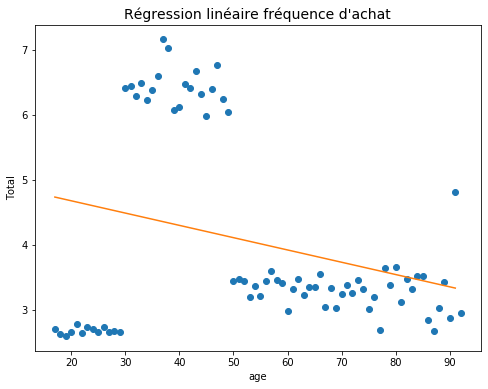

In [64]:
Y = frequence_age['Total']
X = frequence_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une cop
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
plt.figure(figsize=(8, 6))
plt.title("Régression linéaire fréquence d'achat",fontsize=14) 
plt.plot(frequence_age.age,frequence_age.Total, "o")
plt.plot(np.arange(17,92),[a*x+b for x in np.arange(17,92)])
plt.xlabel("age")
plt.ylabel("Total")
plt.show()

##### Coefficient de correlation 

In [65]:
a

-0.01895071309709362

##### Ordonnée à l'origine

In [66]:
b

5.062557813419706

#### c. La taille du panier moyen (en nombre d’articles) <a class="anchor" id="section_3_2_3"></a>

In [67]:
taille_panier = info_id[['client_id','date']].pivot_table(index=['client_id'],columns='date',aggfunc=len)
taille_panier = pd.merge(age,taille_panier, on='client_id', how='right')
taille_panier = taille_panier.drop_duplicates(['client_id'])
taille_panier = taille_panier.groupby(["age"], as_index=False).mean()
taille_panier = taille_panier.set_index('age')
taille_panier['Total'] = taille_panier.mean(axis=1)
taille_panier = taille_panier.reset_index('age')
taille_panier = taille_panier.fillna(value = 0)
taille_panier = taille_panier.loc[:,['age','Total']]
taille_panier

,age,Total
0,17.0,1.768779
1,18.0,1.712877
2,19.0,1.784660
3,20.0,1.746086
4,21.0,1.852153
...,...,...
71,88.0,1.404762
72,89.0,1.570652
73,90.0,1.821429
74,91.0,1.686567


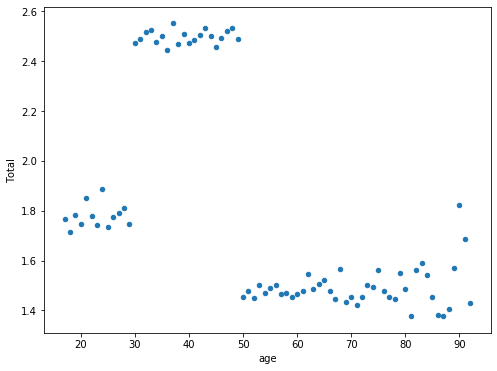

In [68]:
taille_panier.plot(figsize=(8, 6), x='age', y= 'Total', kind = 'scatter')
plt.show()

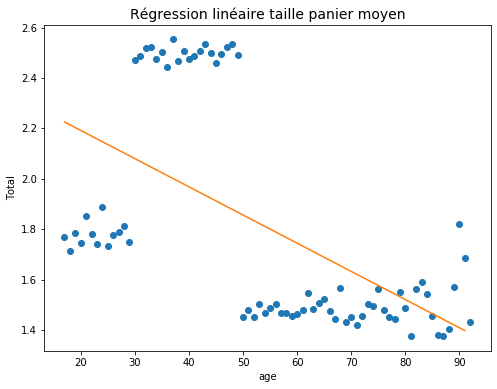

In [69]:
Y = taille_panier['Total']
X = taille_panier[['age']]
X = X.copy() # On modifiera X, on en crée donc une cop
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
plt.figure(figsize=(8, 6))
plt.title('Régression linéaire taille panier moyen',fontsize=14) 
plt.plot(taille_panier.age,taille_panier.Total, "o")
plt.plot(np.arange(17,92),[a*x+b for x in np.arange(17,92)])
plt.xlabel("age")
plt.ylabel("Total")
plt.show()

##### Coefficient de correlation 

In [75]:
print(st.pearsonr(taille_panier["age"],taille_panier["Total"])[0])

-0.5692241564349062


Le coefficient de corrélation ou coefficient de Pearson est proche de 1 on peut établir une relation linéaire entre les variables taille du panier moyen et âge est faible

##### Ordonnée à l'origine

In [71]:
b

2.416038933596678

#### d. Les catégories de produits achetés <a class="anchor" id="section_3_2_4"></a>

In [72]:
age_categ = info_id[['categ','age']]
age_categ

,categ,age
0,0,45.0
1,0,35.0
2,0,32.0
3,0,41.0
4,0,45.0
...,...,...
336811,1,50.0
336812,1,34.0
336813,1,72.0
336814,0,56.0


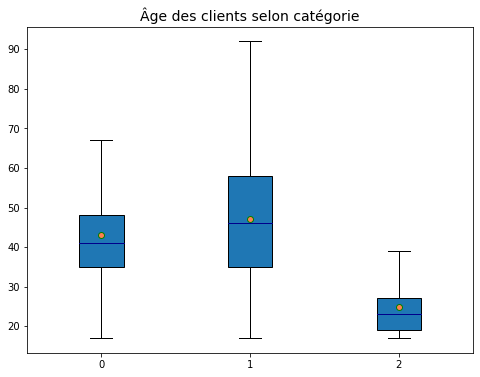

In [73]:
X = "categ" # qualitative
Y = "age" # quantitative

modalites = age_categ[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_categ[age_categ[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Âge des clients selon catégorie',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [74]:
X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(age_categ[X],age_categ[Y])

0.113073637193239

Le calcul d'Eta carré étant très proche de 0, nous ne pouvons pas étalir de correlation entre la variable catégorie et la variable âge. Nous le constatons également grace aux boites à moustaches, elles prennent des valeurs comparables pour les catégories 0 et 1 mais différentes pour la catégorie 2.